In [1]:
%load_ext IPython.extensions.autoreload
%autoreload 2

In [37]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime as dt

from data import FinData
from preprocessing import train_valid_split
from model import CatboostFinModel

In [38]:
data = FinData("../datasets/T_yandex_10min.csv")

data.insert_all()
data.make_binary_class_target()

In [39]:
data.cat_features

['hours',
 'day',
 'minute',
 'is_holiday',
 'pred_holiday',
 'week_pred_holiday',
 'day_time',
 'season']

In [43]:
numeric = data.numeric_features[::5] + data.numeric_features[1::5]

cat = data.cat_features

args = {"iterations" : 10000, 
        "depth" : 5, 
        "learning_rate" : 0.01, # тут слегка неадекватные параметры, которые можно менять 
        "use_best_model" : True, 
        "l2_leaf_reg" : 200,
        "verbose" : 100, # отчет каждые 100 итераций 
        "loss_function" : 'CrossEntropy', 
        "eval_metric" : 'Accuracy', 
        "cat_features" : cat, 
        "random_state" : 42,
        "early_stopping_rounds" : 5000}

# data.restrict_time_down(2024, 11, 1)

In [47]:
X_train, X_val, y_train, y_val = train_valid_split(data=data.df, 
                                                   year=2024, month=12, day=5, 
                                                   numeric=numeric, cat=cat, target="direction_binary")

In [48]:
model = CatboostFinModel(args)

model.set_datasets(X_train, X_val, y_train, y_val)
model.set_features(numeric, cat)

model.fit()

0:	learn: 0.5537687	test: 0.6060606	best: 0.6060606 (0)	total: 96.5ms	remaining: 16m 4s
100:	learn: 0.5559363	test: 0.5858586	best: 0.6111111 (1)	total: 10.7s	remaining: 17m 32s
200:	learn: 0.5581560	test: 0.5909091	best: 0.6111111 (1)	total: 23.2s	remaining: 18m 50s
300:	learn: 0.5596606	test: 0.5959596	best: 0.6111111 (1)	total: 35.3s	remaining: 18m 58s
400:	learn: 0.5609046	test: 0.5959596	best: 0.6111111 (1)	total: 46.6s	remaining: 18m 35s
500:	learn: 0.5617761	test: 0.5909091	best: 0.6111111 (1)	total: 58s	remaining: 18m 20s
600:	learn: 0.5632211	test: 0.5909091	best: 0.6111111 (1)	total: 1m 11s	remaining: 18m 36s
700:	learn: 0.5645545	test: 0.5909091	best: 0.6111111 (1)	total: 1m 22s	remaining: 18m 20s
800:	learn: 0.5657388	test: 0.5909091	best: 0.6111111 (1)	total: 1m 35s	remaining: 18m 16s
900:	learn: 0.5674148	test: 0.5959596	best: 0.6111111 (1)	total: 1m 47s	remaining: 18m 7s
1000:	learn: 0.5685246	test: 0.5959596	best: 0.6111111 (1)	total: 1m 59s	remaining: 17m 54s
1100:	lea

Посмотрим на фильтр Баттерворта

In [28]:
data2 = FinData("../datasets/T_yandex_10min.csv")

data2.insert_shifts_norms([3, 6, 18])
data2.insert_rolling_means()
data2.insert_exp_rolling_means()
data2.insert_stochastic_oscillator()
data2.insert_high_low_diff()
data2.insert_butter_filter()
data2.insert_trend_rsi()
data2.insert_trend_rolling_means()
data2.insert_trend_deviation()

data2.make_binary_class_target()


In [8]:
numeric = data2.numeric_features

cat = data2.cat_features

args = {"iterations" : 10000, 
        "depth" : 5, 
        "learning_rate" : 0.01, # тут слегка неадекватные параметры, которые можно менять 
        "use_best_model" : True, 
        "l2_leaf_reg" : 200,
        "verbose" : 100, # отчет каждые 100 итераций 
        "loss_function" : 'CrossEntropy', 
        "eval_metric" : 'Accuracy', 
        "cat_features" : cat, 
        "random_state" : 42,
        "early_stopping_rounds" : 5000}

X_train, X_val, y_train, y_val = train_valid_split(data=data2.df, 
                                                   year=2024, month=12, day=5, 
                                                   numeric=numeric, cat=cat, target="direction_binary")

model = CatboostFinModel(args)

model.set_datasets(X_train, X_val, y_train, y_val)
model.set_features(numeric, cat)

model.fit()


0:	learn: 0.6563452	test: 0.6262626	best: 0.6262626 (0)	total: 178ms	remaining: 29m 36s
100:	learn: 0.6615891	test: 0.6363636	best: 0.6464646 (7)	total: 3.59s	remaining: 5m 52s
200:	learn: 0.6668926	test: 0.6363636	best: 0.6464646 (7)	total: 7.35s	remaining: 5m 58s
300:	learn: 0.6711160	test: 0.6464646	best: 0.6464646 (7)	total: 11s	remaining: 5m 55s
400:	learn: 0.6740434	test: 0.6414141	best: 0.6464646 (7)	total: 14.6s	remaining: 5m 49s
500:	learn: 0.6759354	test: 0.6565657	best: 0.6565657 (480)	total: 17.9s	remaining: 5m 38s
600:	learn: 0.6774624	test: 0.6666667	best: 0.6666667 (595)	total: 21.5s	remaining: 5m 35s
700:	learn: 0.6785499	test: 0.6717172	best: 0.6717172 (649)	total: 25.1s	remaining: 5m 32s
800:	learn: 0.6795331	test: 0.6717172	best: 0.6717172 (649)	total: 28.4s	remaining: 5m 25s
900:	learn: 0.6801514	test: 0.6717172	best: 0.6717172 (649)	total: 31.9s	remaining: 5m 21s
1000:	learn: 0.6805983	test: 0.6666667	best: 0.6717172 (649)	total: 35.3s	remaining: 5m 17s
1100:	learn

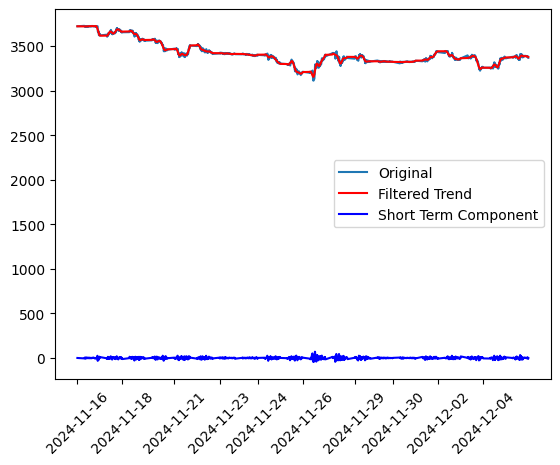

In [25]:
data2.restrict_time_down_stupidly(months=0, days=20)
data2.insert_butter_filter(visualise=True)